# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** I Putu Hananda Weldy Nugraha
- **Email:** weldynugraha@gmail.com
- **ID Dicoding:** weldy_nugraha_4lJK

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?
- Pertanyaan 2 : Apakah ada pola penyewaan sepeda berdasarkan hari dalam seminggu atau jam dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import streamlit as st

## Data Wrangling

### Gathering Data

In [ ]:
url = 'https://drive.google.com/uc?id=1yL3ulHq_QTLRHifVjISmGCq9qKXaIHud'
day = pd.read_csv(url)
day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
url2 = 'https://drive.google.com/uc?id=14vZd0xgkZgxEVqgLlQYWxhAxO9f3_ob3'
hour = pd.read_csv(url2)
hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


- Memabaca data dari dua file CSV yang di hosting di Google Drive menggunakan pd.read_csv().
- Data tersebut disimpan dalam variabel day dan hour

### Assessing Data
Pada tahap ini, kita akan menilai kualitas data dengan melihat beberapa baris pertama data, informasi umum data, statistik deskriptif, dan memeriksa missing values.

In [ ]:
day.head()
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


- Menampilkan beberapa baris pertama data menggunakan head().

In [ ]:
day.info()
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

- Melihat informasi umum data menggunakan info().

In [ ]:
day.describe()
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


- Melihat statistik deskriptif menggunakan describe().

In [ ]:
day.isnull().sum()
hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


- Memeriksa missing values menggunakan isnull().

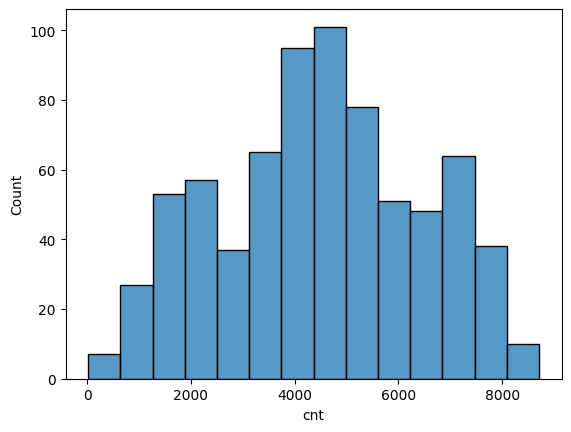

In [ ]:
sns.histplot(day['cnt'])
plt.show()

**Insight:**
- xxx
- xxx

### Cleaning Data
Tahap ini meliputi proses pembersihan data, seperti mengisi missing values dan mengubah tipe data.

In [ ]:
day['temp'].fillna(day['temp'].mean(), inplace=True)

<ipython-input-11-7f583614f21b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day['temp'].fillna(day['temp'].mean(), inplace=True) # Ganti 'temp' dengan nama kolom yang ingin diimputasi


- Mengisi missing values pada kolom 'temp' dengan nilai rata-rata menggunakan fillna().

In [ ]:
day['dteday'] = pd.to_datetime(day['dteday'])

- Mengubah tipe data kolom 'dtday' menjadi datetime menggunakan pd.to_datetime().

## Exploratory Data Analysis (EDA)
Pada tahap ini, kita akan melakukan eksplorasi data dengan membuat berbagai visualisasi untuk memahami hubungan antara variabel-variabel dalam dataset.

### Explore ...

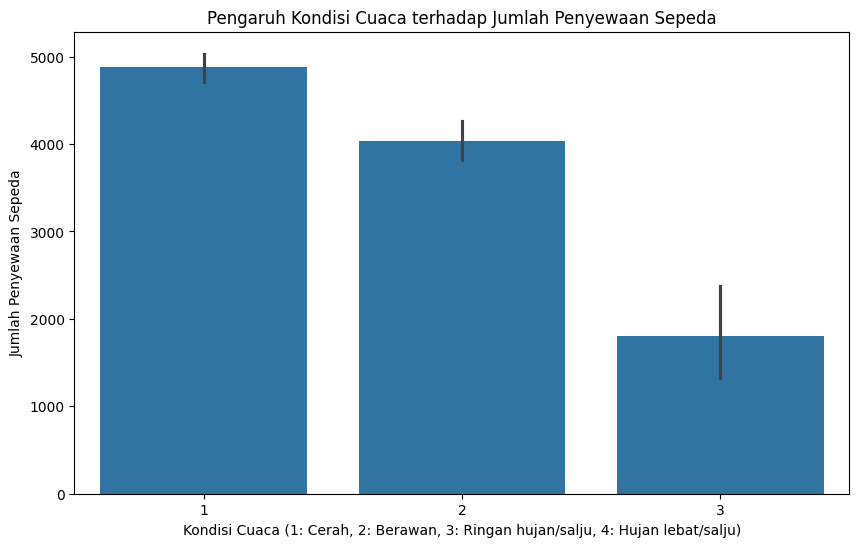

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=day)
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca (1: Cerah, 2: Berawan, 3: Ringan hujan/salju, 4: Hujan lebat/salju)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

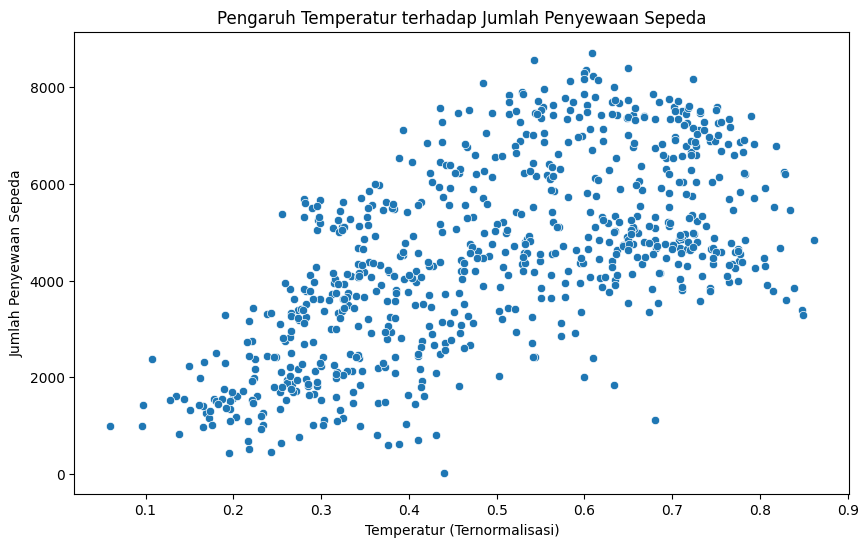

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day)
plt.title('Pengaruh Temperatur terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Temperatur (Ternormalisasi)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

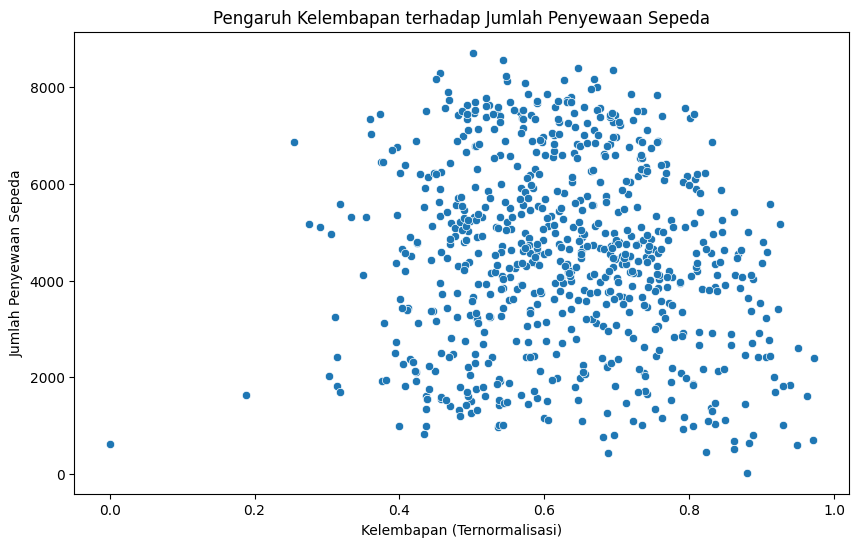

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=day)
plt.title('Pengaruh Kelembapan terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Kelembapan (Ternormalisasi)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

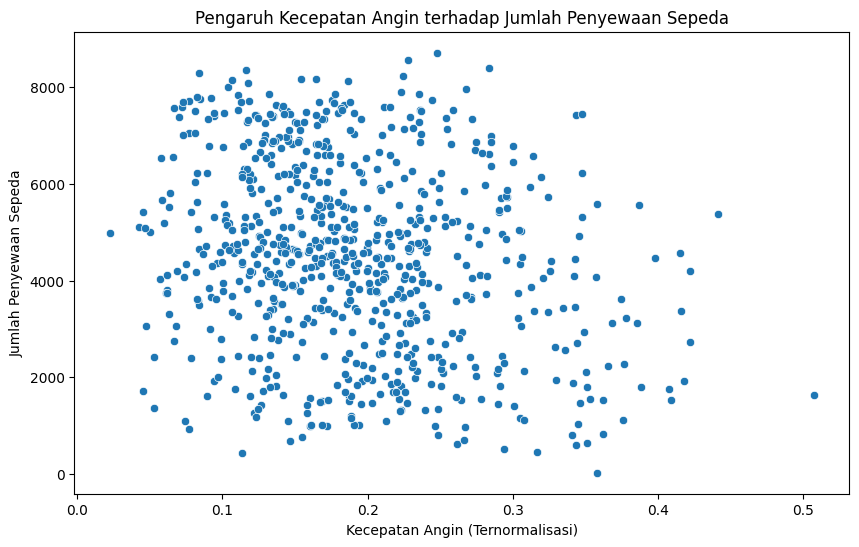

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='cnt', data=day)
plt.title('Pengaruh Kecepatan Angin terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Kecepatan Angin (Ternormalisasi)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

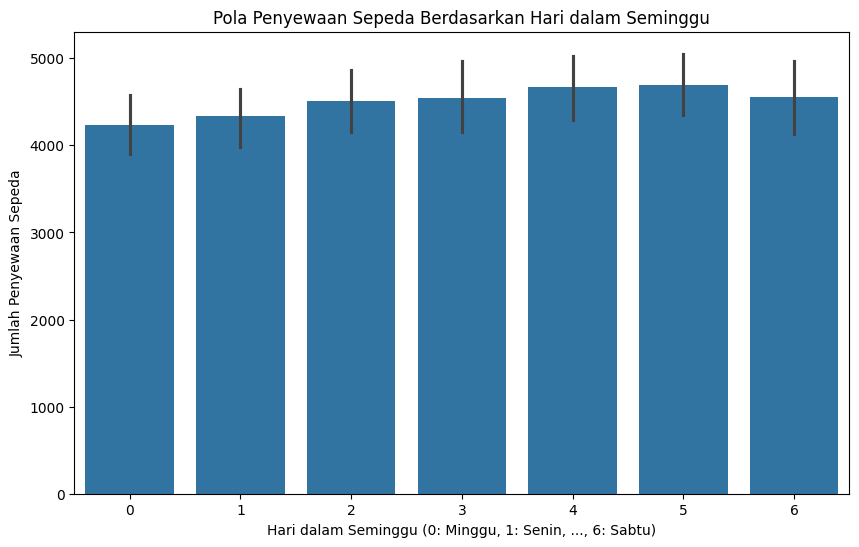

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', data=day)
plt.title('Pola Penyewaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu (0: Minggu, 1: Senin, ..., 6: Sabtu)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

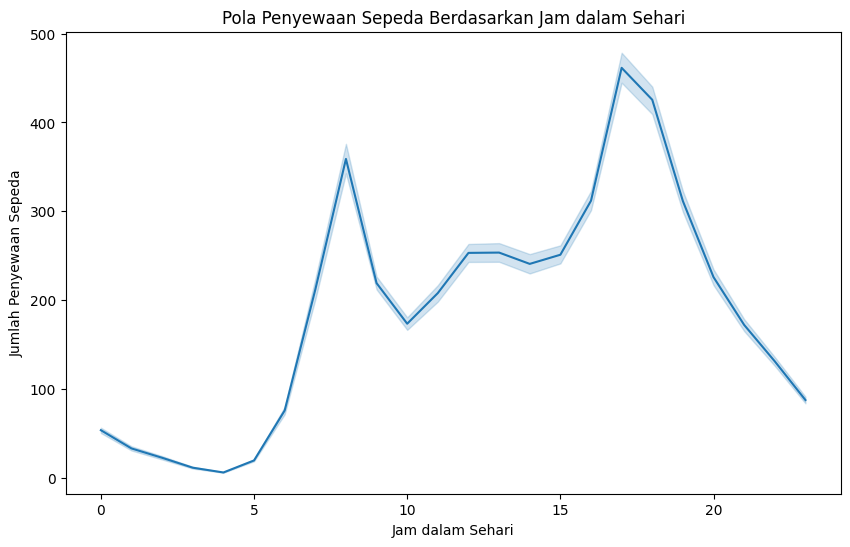

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', data=hour)
plt.title('Pola Penyewaan Sepeda Berdasarkan Jam dalam Sehari')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

- Membuat berbagai visualisasi untuk memahami hubungan antara variabel-variabel dalam dataset, seperti pengaruh cuaca, temperatur, kelembapan, kecepatan angin, hari dalam seminggu, dan jam dalam sehari terhadap jumlah penyewaan sepeda.

## Visualization & Explanatory Analysis
Tahap ini bertujuan untuk menjawab pertanyaan bisnis yang telah dirumuskan sebelumnya dengan visualisasi yang lebih informatif dan penjelasan yang detail.

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

#### Visualisasi 1: Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda

<ipython-input-17-b46e46c720d8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=day, palette="Blues_d")


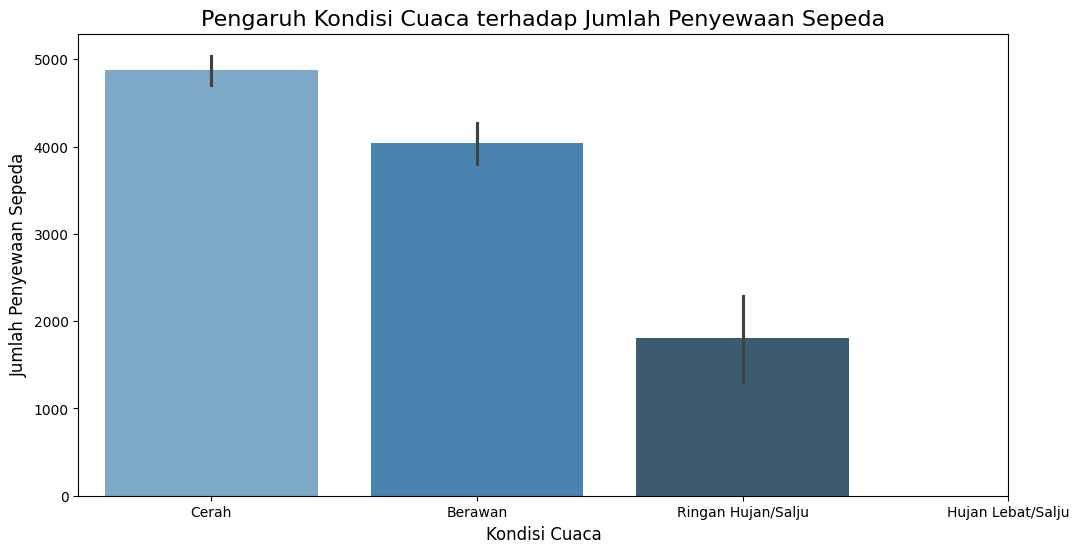

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='weathersit', y='cnt', data=day, palette="Blues_d")
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda', fontsize=16)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah', 'Berawan', 'Ringan Hujan/Salju', 'Hujan Lebat/Salju'])
plt.show()

Dari visualisasi di atas, dapat dilihat bahwa kondisi cuaca memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda.

Jumlah penyewaan tertinggi terjadi saat cuaca cerah, dan menurun secara signifikan saat cuaca buruk (hujan lebat/salju).

#### Visualisasi 2: Pengaruh Temperatur dan Kelembapan terhadap Jumlah Penyewaan Sepeda

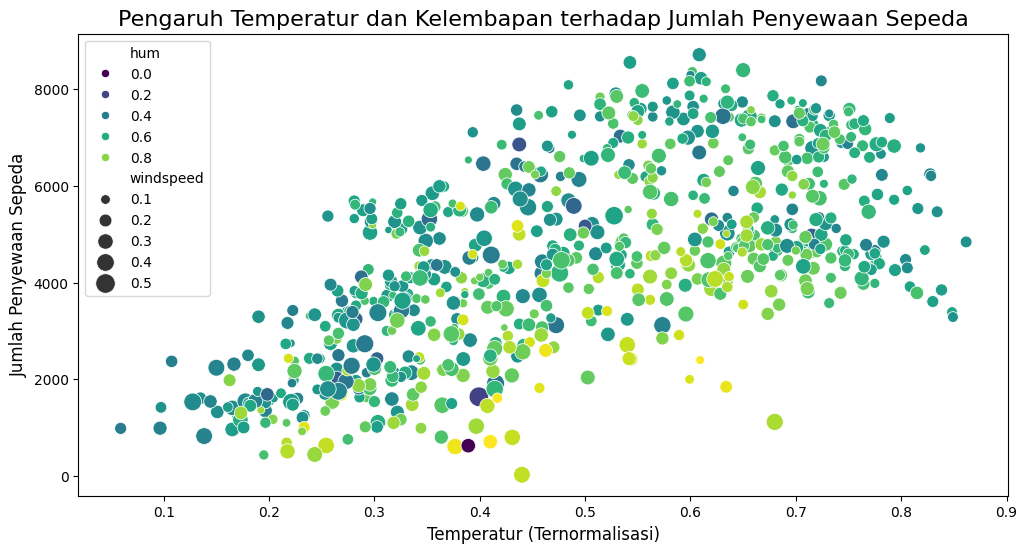

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temp', y='cnt', data=day, hue='hum', size='windspeed', palette="viridis", sizes=(20, 200))
plt.title('Pengaruh Temperatur dan Kelembapan terhadap Jumlah Penyewaan Sepeda', fontsize=16)
plt.xlabel('Temperatur (Ternormalisasi)', fontsize=12)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=12)
plt.show()

Visualisasi ini menunjukkan bahwa temperatur dan kelembapan memiliki korelasi positif dengan jumlah penyewaan sepeda.

Semakin tinggi temperatur dan kelembapan, semakin banyak sepeda yang disewa.

Ukuran titik menunjukkan kecepatan angin, di mana titik yang lebih besar menunjukkan kecepatan angin yang lebih tinggi.

### Pertanyaan 2: Apakah ada pola penyewaan sepeda berdasarkan hari dalam seminggu atau jam dalam sehari?

#### Visualisasi 3: Pola Penyewaan Sepeda Berdasarkan Hari dalam Seminggu

<ipython-input-19-125e7dc05418>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='cnt', data=day, palette="Spectral")


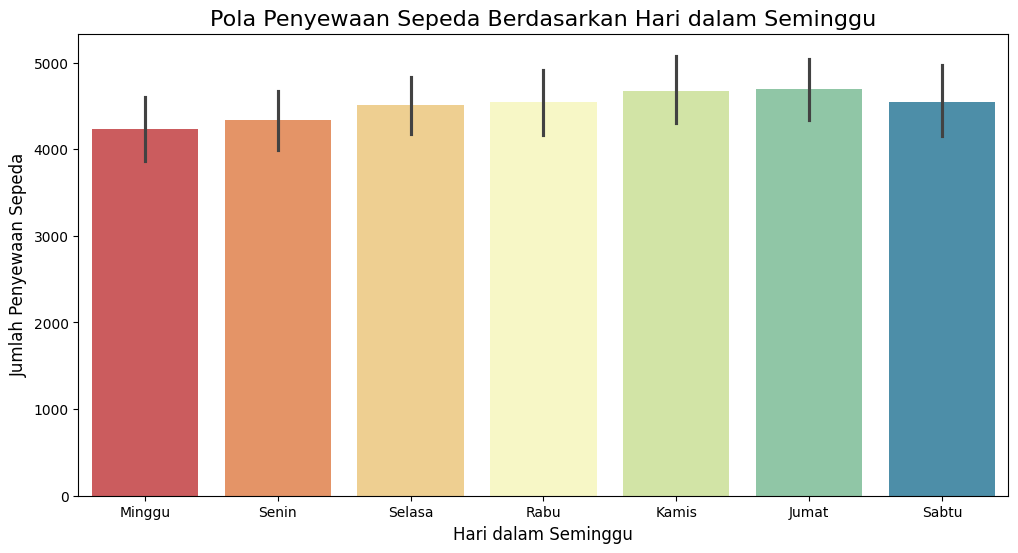

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='weekday', y='cnt', data=day, palette="Spectral")
plt.title('Pola Penyewaan Sepeda Berdasarkan Hari dalam Seminggu', fontsize=16)
plt.xlabel('Hari dalam Seminggu', fontsize=12)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])
plt.show()

Visualisasi ini menunjukkan bahwa jumlah penyewaan sepeda cenderung lebih tinggi pada hari kerja (Senin-Jumat) dibandingkan dengan akhir pekan (Sabtu-Minggu).

#### Visualisasi 4: Pola Penyewaan Sepeda Berdasarkan Jam dalam Sehari

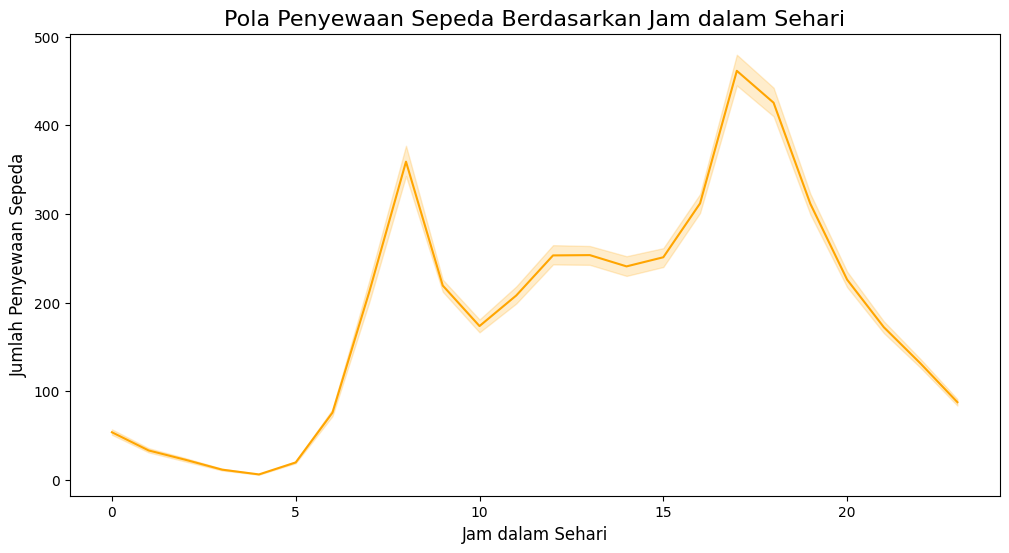

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=hour, color="orange")
plt.title('Pola Penyewaan Sepeda Berdasarkan Jam dalam Sehari', fontsize=16)
plt.xlabel('Jam dalam Sehari', fontsize=12)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=12)
plt.show()

Visualisasi ini menunjukkan bahwa terdapat dua puncak penyewaan sepeda dalam sehari, yaitu pada jam berangkat dan pulang kerja (sekitar pukul 7-9 pagi dan 17-19 sore).

## Analisis Lanjutan (Opsional)
Pada tahap ini, kita dapat melakukan analisis lanjutan seperti menghitung matriks korelasi antar variabel.

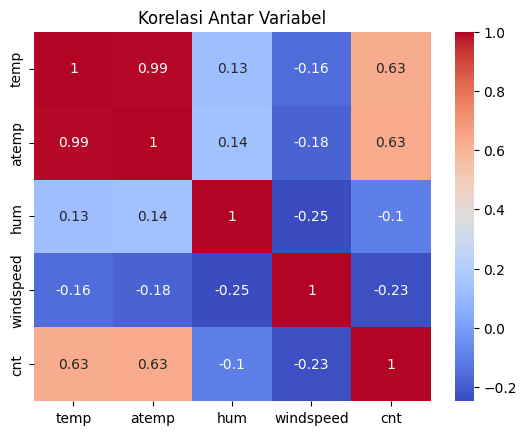

In [ ]:
correlation_matrix = day[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel')
plt.show()

## Conclusion
Tahap ini berisi kesimpulan dari hasil analisis dan saran berdasarkan insight yang didapatkan.


pertanyaan 1: Pengaruh cuaca terhadap jumlah penyewaan sepeda:

- Kondisi cuaca memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda. Cuaca cerah dan temperatur yang hangat cenderung meningkatkan jumlah penyewaan, sedangkan cuaca buruk seperti hujan lebat/salju menurunkan jumlah penyewaan.
- Kelembapan dan kecepatan angin juga berpengaruh, tetapi tidak sekuat kondisi cuaca dan temperatur.


pertanyaan 2: Pola penyewaan sepeda berdasarkan hari dalam seminggu atau jam dalam sehari:

- Terdapat pola penyewaan yang jelas berdasarkan hari dalam seminggu dan jam dalam sehari.
- Jumlah penyewaan cenderung lebih tinggi pada hari kerja dibandingkan dengan akhir pekan.
- Terdapat dua puncak penyewaan dalam sehari, yaitu pada jam berangkat dan pulang kerja.

Saran:

- Berdasarkan hasil analisis, disarankan untuk memfokuskan strategi pemasaran pada saat cuaca cerah dan temperatur hangat.
- Perlu dipertimbangkan untuk menyediakan lebih banyak sepeda pada jam-jam sibuk dan hari kerja untuk memenuhi permintaan.
- Melakukan promosi khusus pada akhir pekan untuk meningkatkan jumlah penyewaan.